In [1]:
%matplotlib inline

import itertools as itt
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from md_distance import md_distance
from refframes import refframe_switch1
from refframes import refframe_switch2

In [2]:
source = 'vreede'
run = 'run3'
if source == 'vreede':
    current_dir = '/home/sanderroet/Ras-JV/'+run+'/analysis/'
    name = 'vreede_'+run
elif source == 'carbon':
    current_dir = '/home/sanderroet/carbon/kras_100ns/'+run+'/analysis/'
    name = 'carbon_'+run
xtc = current_dir + 'vis-md.xtc'
pdb = current_dir + 'vis-md.pdb'

In [3]:
%%time
trj = md.load(xtc, top = pdb)
#reference = md.load(test_pdb)

CPU times: user 19.2 s, sys: 1.56 s, total: 20.7 s
Wall time: 23.7 s


In [4]:
%%time
topology = trj.topology
glu63 = topology.select('protein and resSeq 63 and element O')#not backbone and element O and not name H and not name O')
glu62 = topology.select('protein and resSeq 62 and element O')#not backbone and element O and not name H and not name O')
GTP = topology.select('(resname GTP and element O) or element Mg')
water = topology.select('water and element O')
for i in glu63:
    print(topology.atom(i).residue)

GLU63
GLU63
GLU63
CPU times: user 123 ms, sys: 0 ns, total: 123 ms
Wall time: 124 ms


In [5]:
%%time
print('computing glu63_water')
glu63_water = md.compute_neighbors(traj=trj,cutoff = 0.31, query_indices=glu63, haystack_indices = water) 
print('computing glu62_water')
glu62_water = md.compute_neighbors(traj=trj,cutoff = 0.31, query_indices=glu62, haystack_indices = water) 
print('computing GTP_water')
GTP_water = md.compute_neighbors(traj=trj,cutoff = 0.31, query_indices=GTP, haystack_indices = water) 

computing glu63_water
computing glu62_water
computing GTP_water
CPU times: user 31.6 s, sys: 125 ms, total: 31.7 s
Wall time: 31.3 s


In [6]:
%%time
glu63_water_residues = []
glu62_water_residues = []
GTP_water_residues = []
for i,e in enumerate(glu63_water):
    temp = [topology.atom(x).residue for x in e]
    glu63_water_residues.append(temp)
for i,e in enumerate(glu62_water):
    temp = [topology.atom(x).residue for x in e]
    glu62_water_residues.append(temp)
for i,e in enumerate(GTP_water):
    temp = [topology.atom(x).residue for x in e]
    GTP_water_residues.append(temp)


CPU times: user 247 ms, sys: 0 ns, total: 247 ms
Wall time: 246 ms


In [7]:
%%time
glu63_results = np.zeros(len(glu63_water_residues))
glu62_results = np.zeros(len(glu62_water_residues))
prev = 0
for i, e in enumerate(glu63_water_residues):
    if set(e).isdisjoint(GTP_water_residues[i]) == True:
        glu63_results[i] = 1
    else:
        temp = 0
        for j in e:
            if j in GTP_water_residues[i]:
                temp = 1
        if temp == 0:
            print('somtehing is wrong')
            
for i, e in enumerate(glu62_water_residues):
    if set(e).isdisjoint(GTP_water_residues[i]) == True:
        glu62_results[i] = 1
print(glu63_water_residues[6306])
print(GTP_water_residues[6306])
#print(glu63_water_residues[1])
#print(GTP_water_residues[1])
#print(glu63_water_residues[2])
#print(GTP_water_residues[2])
#print(GTP_water_residues[1])
#print(glu63_water_residues[2])
#print(GTP_water_residues[2])

[HOH7188, HOH7531, HOH9712, HOH580, HOH836, HOH1601, HOH3041]
[HOH7090, HOH7710, HOH7757, HOH7831, HOH8190, HOH8428, HOH9575, HOH9741, HOH118, HOH1601, HOH2319, HOH2980, HOH3020, HOH3352]
CPU times: user 41.9 ms, sys: 0 ns, total: 41.9 ms
Wall time: 41.7 ms


In [8]:
for i in glu63:
    print(trj.xyz[1][i])
print('\n')
for i in glu63_water[1]:
    print(i)
    print(topology.atom(i).residue.index)
    print(topology.select('resid '+str(topology.atom(i).residue.index)))
    print(trj.xyz[1][i])
print(topology.select('resSeq 9397'))
for i in glu63:
    for j in topology.select('resSeq 9397'):

        distance = trj.xyz[1][i] - trj.xyz[1][j]
        print(i,j,distance, np.sqrt(np.dot(distance,distance)))
for i in range(len(trj)):
    if np.all(abs(trj.xyz[i][10313]-np.array([5.69, 4.40, 1.73])) < 0.05):
        print(i)
        pass
print(trj.xyz[0][10313])

[ 5.86559963  4.53979969  1.54939997]
[ 5.82079983  4.37659979  1.6825999 ]
[ 6.37680006  4.54679966  1.73159993]


10312
2749
[10312 10313 10314]
[ 5.64179993  4.27419996  1.89959991]
13162
3699
[13162 13163 13164]
[ 5.88439989  4.42639971  1.27639997]
15376
4437
[15376 15377 15378]
[ 5.5934      4.31279993  1.58819997]
18199
5378
[18199 18200 18201]
[ 5.85339975  4.16639996  1.46499991]
22498
6811
[22498 22499 22500]
[ 6.03599977  4.72179985  1.43139994]
[10312 10313 10314]
959 10312 [ 0.22379971  0.26559973 -0.35019994] 0.493224
959 10313 [ 0.15279961  0.2947998  -0.29359996] 0.443233
959 10314 [ 0.26359987  0.19239998 -0.30299997] 0.445322
960 10312 [ 0.1789999   0.10239983 -0.21700001] 0.299359
960 10313 [ 0.1079998   0.1315999  -0.16040003] 0.233903
960 10314 [ 0.21880007  0.02920008 -0.16980004] 0.278493
962 10312 [ 0.73500013  0.2725997  -0.16799998] 0.801723
962 10313 [ 0.66400003  0.30179977 -0.11140001] 0.737827
962 10314 [ 0.7748003   0.19939995 -0.12080002] 0.809116
0
[ 5.

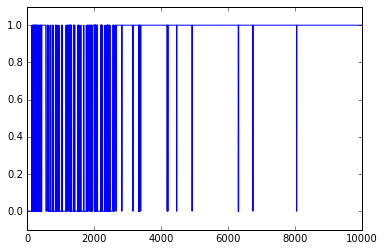

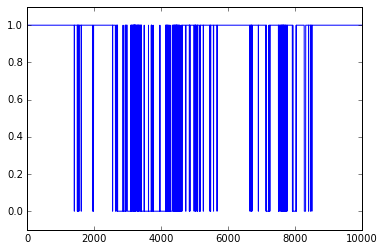

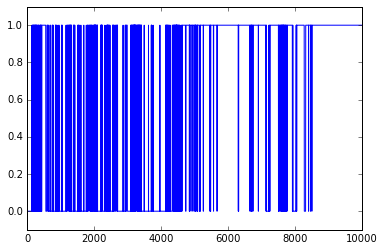

In [9]:
combined_results = []
for i, e in enumerate(glu62_results):
    combined_results.append(min([e,glu63_results[i]]))

for i in [glu63_results, glu62_results, combined_results]:
    y = i
    x = range(len(i))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_ylim(-0.1,1.1)